# [IAPR][iapr]: Project ‒  Coin classification


**Group ID:** 56

**Author 1 (sciper):** Shujiro Shobayashi (314853)  
**Author 2 (sciper):** Camille Pittet (326866)   
**Author 3 (sciper):** Renuka Singh Virk (326470) 

**Release date:** 26.04.2024  
**Due date:** 31.05.2024 (8:15 pm)


## Important notes

Each group must upload an archive by May 29th, 11:59 PM that includes:

1. A report of your work in Jupyter Notebook format. It should provide detailed explanations of your method along with the code for every step of the project. The Jupyter Notebook should be capable of generating the final submission you submitted on Kaggle when rerun.
2. A requirements.txt file listing all Python packages you used.
3. Any additional files that you used.
TAs should be able to rerun your code end to end without having any issues. If not, you might lose part of the points during grading.

Please name the archive file with the number of your team, e.g. Group28.zip.

## Import libraries

In [31]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

from PIL import Image
from skimage.color import rgb2gray
from typing import Callable
from datetime import datetime
from helper_functions import *
from skimage.morphology import *

## Data Inspection

### Reference Coins

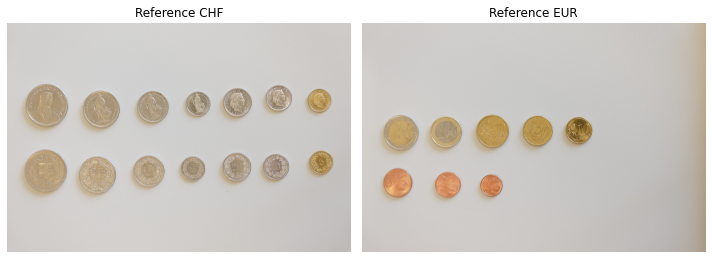

In [13]:
# Define paths
path_chf = './data/ref/ref_chf.JPG'
path_eur = './data/ref/ref_eur.JPG'

# Load images
img_ref_chf = np.array(Image.open(path_chf))
img_ref_eur = np.array(Image.open(path_eur))


# Create a figure with subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Display the images
ax[0].imshow(img_ref_chf)
ax[0].set_title('Reference CHF')  # Set title for the first image
ax[1].imshow(img_ref_eur)
ax[1].set_title('Reference EUR')  # Set title for the second image

# Remove the axis ticks
ax[0].axis('off')
ax[1].axis('off')

# Show the plot
plt.tight_layout()
plt.show()

### Load Data

In [14]:
# load data
sample_submission = pd.read_csv("data/sample_submission.csv")
train_labels = pd.read_csv("data/train_labels.csv")

# display data 
display(sample_submission.head())
display(train_labels.head())

,id,5CHF,2CHF,1CHF,0.5CHF,0.2CHF,0.1CHF,0.05CHF,2EUR,1EUR,0.5EUR,0.2EUR,0.1EUR,0.05EUR,0.02EUR,0.01EUR,OOD
0,L0000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,L0000001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,L0000002,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,L0000003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,L0000004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,id,5CHF,2CHF,1CHF,0.5CHF,0.2CHF,0.1CHF,0.05CHF,2EUR,1EUR,0.5EUR,0.2EUR,0.1EUR,0.05EUR,0.02EUR,0.01EUR,OOD
0,L1010281,0,0,0,0,2,3,1,0,0,0,0,0,2,0,0,0
1,L1010298,0,2,1,2,0,0,0,0,0,0,0,0,0,0,0,0
2,L1010321,0,0,1,2,0,0,0,1,2,0,2,1,0,0,0,0
3,L1010310,0,0,1,1,0,0,1,2,0,1,0,0,0,1,0,0
4,L1010300,0,1,0,0,0,0,0,1,0,2,0,1,0,0,0,0


## Image Processing

### Convert to Grayscale

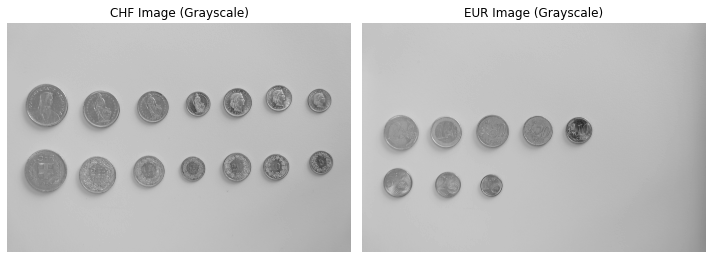

In [20]:
# Convert images to grayscale
chf_gray = rgb2gray(img_ref_chf)
eur_gray = rgb2gray(img_ref_eur)

# Create a figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Display grayscale images and add titles
axs[0].imshow(chf_gray, cmap='gray')
axs[0].axis('off')
axs[0].set_title('CHF Image (Grayscale)')
axs[1].imshow(eur_gray, cmap='gray')
axs[1].axis('off')
axs[1].set_title('EUR Image (Grayscale)')

# Show the plot with adjusted spacing
plt.tight_layout()
plt.show()

### Find appropriate hsv Thresholds

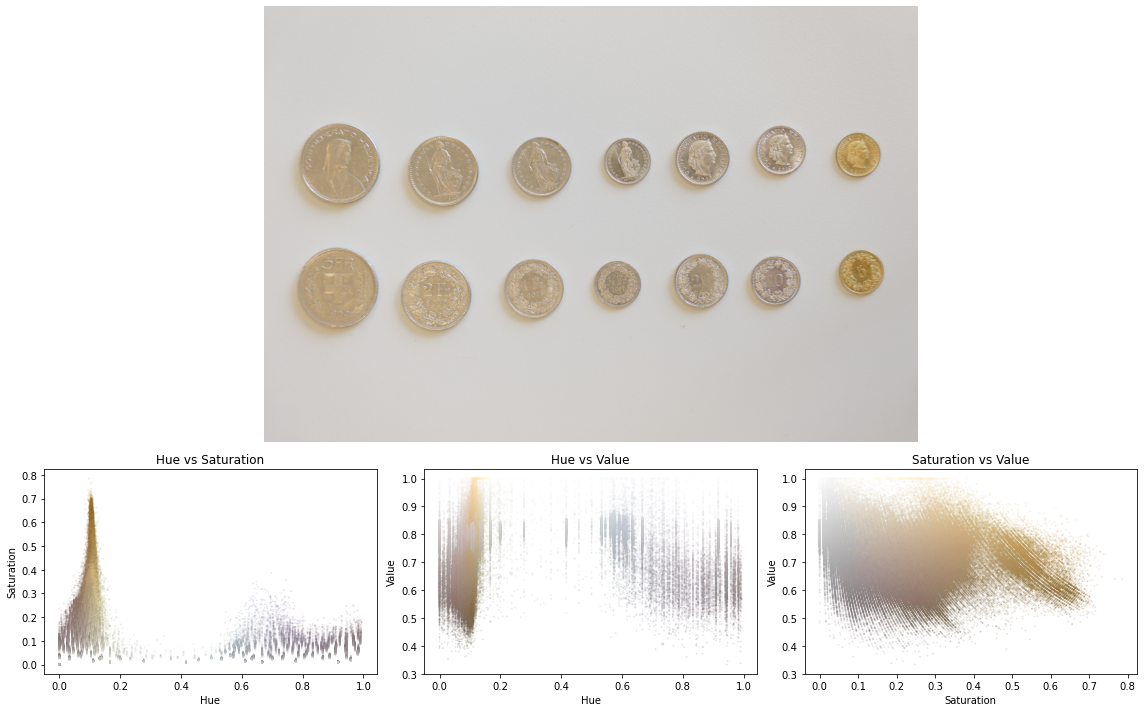

In [35]:

plot_colors_histo(
    img = img_he,
    func = extract_hsv_channels,
    labels = ["Hue", "Saturation", "Value"],
)

### Threshold Image

In [39]:
### TO ADDD
# Set thresholds for each component
    values_hsv = [0.1,0.2,0.7]
    
    # Threshold data
    h_th = data_h < values_hsv[0]
    s_th = data_s > values_hsv[1]
    v_th = data_v < values_hsv[2]
    # Reconstruct image

    img_th = np.logical_and(h_th, np.logical_and(s_th, v_th))

error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'imshow'
> Overload resolution failed:
>  - mat data type = 0 is not supported
>  - Expected Ptr<cv::cuda::GpuMat> for argument 'mat'
>  - Expected Ptr<cv::UMat> for argument 'mat'


## Morphology

### Closing

In [40]:

# Define disk sizes
disk_sizes = [30, 40, 50, 60]
imgs_closing = []

# Apply threhsold in HSV space
img_th = apply_hsv_threshold(img_he,values_hsv)

# Apply opening and closing to masked image 
for d in disk_sizes:
    imgs_closing.append(apply_closing(img_th, d))
    
# Plot results
plot_images(imgs=imgs_closing, sizes=disk_sizes, title="Closing")